<a href="https://colab.research.google.com/github/jiriyaporn/data_viz/blob/main/histrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time

In [9]:
path = '/content/drive/My Drive/dataviz'

In [10]:
search_request = pd.read_csv(os.path.join(path,'search_request.csv'))
search_request.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


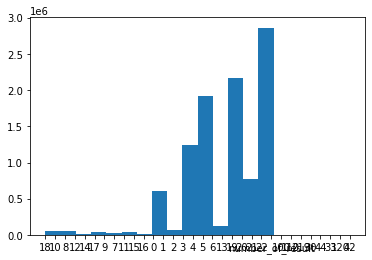

In [11]:
hist = plt.hist(list(search_request['number_of_result']),20)

In [12]:
search_request['search_timestamp'] = pd.to_datetime(search_request['search_timestamp'],format ='%Y/%m/%d %H:%M:%S.%f',errors='coerce')
search_request.head()

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


In [13]:
times = search_request['search_timestamp'].dt.time
search_request['times'] = times

In [14]:
from datetime import time

In [15]:
search1 = search_request[search_request['times'] >= time(hour=11,minute=00,second=00)]
search2 = search1[search1['times'] < time(hour=12,minute=00,second=00)]
search3 = search_request[search_request['times'] >= time(hour=23,minute=00,second=00)]
search23 = search3[search3['times'] < time(hour=23,minute=59,second=00)]

In [16]:
search2['label']='1'
search23['label']='2'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
day_of_week = search_request['search_timestamp'].dt.dayofweek
search_request['day_of_week'] = day_of_week

In [ ]:
times_pair = pd.concat([search2,search23])
times_pair['day_of_week'] = times_pair['search_timestamp'].dt.dayofweek
times_pair

In [ ]:
time_pair.groupby('day_of_week')['search_id']

In [ ]:
fig, ax = plt.subplots()

ax.bar(times_pair['label'], times_pair['day_of_week']=='0', width, label='mon')
ax.bar(times_pair['label'], times_pair['day_of_week']=='1', width,label='tue',bottom=times_pair['day_of_week'])
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [18]:
search_request.dtypes

Unnamed: 0                   int64
search_id                   object
search_timestamp    datetime64[ns]
user_agent                  object
q                           object
user_id                    float64
session_id                  object
number_of_result            object
lat                         object
long                        object
times                       object
day_of_week                float64
dtype: object

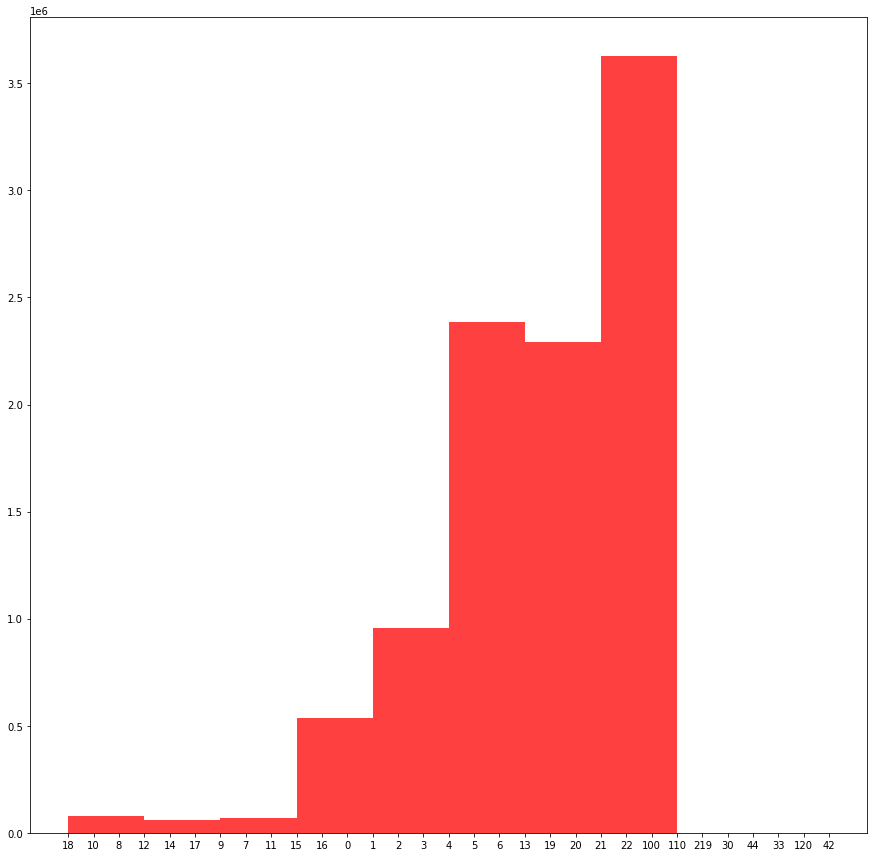

In [25]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,15]
output = plt.hist(list(search_request['number_of_result']),10,facecolor = 'red' ,alpha = 0.75)

ตรวจสอบ data type ของตัวแปร

In [19]:
type(search_request['number_of_result'][0])== int

True

ตรวจสอบ data type

In [20]:
for x in search_request['number_of_result']:
  if type(x) != int:
    print(f'{x} -. {type(x)}')


เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 'str'>
0 -. <class 

In [21]:
search_request['number_of_result'].astype('int32')

ValueError: ignored

ลบ record ที่มีค่า ในคอลัมม์ 'number_result'



In [ ]:
search_request[search_request]

In [22]:
search_request = search_request.drop(1000016)

In [26]:

search_request[search_request['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long,times,day_of_week


In [27]:
new_type = search_request['number_of_result'].astype('int32')

ลบ outlier

In [23]:
new_type_nooutlier = new_type[new_type <  50]

NameError: ignored

In [ ]:
new_type.shape[0] - new_type_nooutlier.shape[0]

In [ ]:
matplotlip.rcParams['figure.figsize']==[15,15]
output = plt.hist(new_type_nooutlier,100,facecolor = 'red' ,alpha = 0.75)

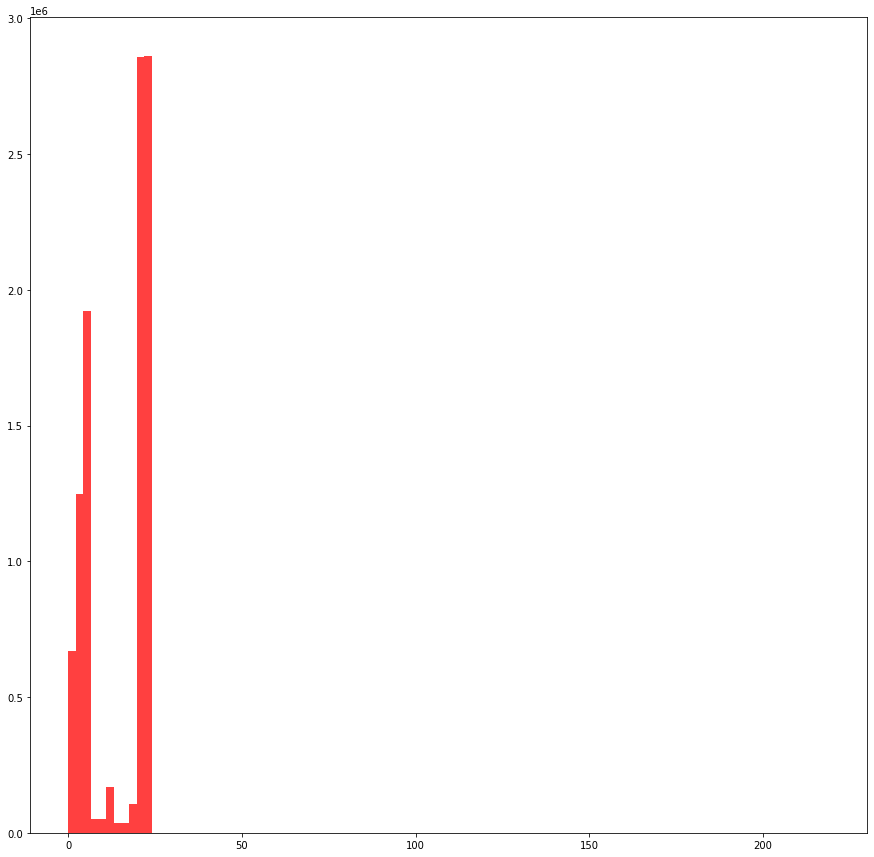

In [28]:
output = plt.hist(new_type,100,facecolor = 'red' ,alpha = 0.75)


ลบ outlier

In [29]:
new_type_nooutlier = new_type[new_type < 25]

In [30]:
new_type.shape[0] - new_type_nooutlier.shape[0]

14

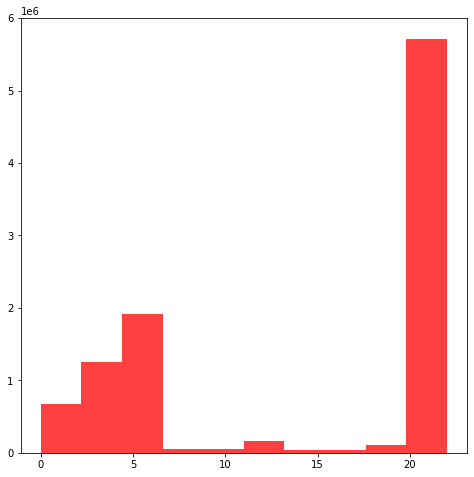

In [31]:
matplotlib.rcParams['figure.figsize']=[8,8]
output = plt.hist(new_type_nooutlier,10,facecolor = 'red' ,alpha = 0.75)

Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับ แท่งอื่นๆรวมกัน



In [33]:
output

(array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
          36883.,   35914.,  105490., 5717238.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

In [35]:

output
